# Statistical Modeling I


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_1samp



## What is statistical modeling?

Statistical modeling, often referred to as **empirical modeling**, is a data-driven approach used to represent and predict environmental systems.\
It is built directly from observations, using statistical techniques to capture relationships among variables rather than deriving them from theoretical laws.

In contrast, **mechanistic modeling** describes environmental systems by explicitly representing physical, chemical, or biological processes.\
While mechanistic models aim to explain how a system functions, empirical models prioritize identifying patterns in data for inference and prediction.\
In environmental science, these approaches serve different purposes and are commonly used together.

Empirical models are **calibrated (fitted) and validated (tested) using data**.\
Calibration involves estimating model parameters so that the model best represents the observed data, while validation evaluates how well the model performs on independent or unseen data.\
This process helps ensure that the model is reliable and not just describing random patterns in a single dataset.

Before applying any statistical model, it is essential to understand how the data are distributed.\
Many statistical methods rely on assumptions about data distributions, which directly influence which analyses are appropriate.\
For this reason, statistical modeling begins with **descriptive statistics and data visualization**, providing the foundation for hypothesis testing and regression analysis.

<p align="left">
  <img src="https://raw.githubusercontent.com/RaHub4AI/MI4011_Block1/refs/heads/main/Pictures/descriptive_statistics.png"
       alt="descriptive_statistics"
       width="800">
</p>


### Data distributions

Understanding how data are distributed is a fundamental step in statistical modeling. The distribution of a dataset describes how values are spread, clustered, or skewed, and it strongly influences which statistical methods can be applied and how results should be interpreted.

Many statistical techniques assume that data follow a specific distribution, most commonly the **normal distribution**. When these assumptions are met, parametric methods can be used, which are often more powerful. However, environmental data frequently deviate from normality due to natural variability, measurement limits, or underlying processes.

Common data distributions in environmental science include:
- **Normal distribution**, often assumed for measurement errors and some continuous variables  
- **Lognormal distribution**, frequently observed for concentrations of chemicals
- **Poisson distribution**, commonly used for count data such as species abundance or event frequency  


> At this point, you may have seen the terms **parametric** and **non-parametric** statistics mentioned in the figure and text.
> When we talk about **parametric** and **non-parametric** statistics, the key idea is whether a method relies on **parameters** that describe the data distribution. Parameters are numerical values that define the shape and location of a distribution, such as the mean and standard deviation in a normal distribution.
>
> **Parametric methods** assume that the data come from a specific distribution and estimate its parameters from the data. **Non-parametric methods** do not assume a particular distribution and therefore do not rely on distribution parameters in the same way.
>
> This is why understanding data distributions is important. If the distributional assumptions are reasonable, parametric methods can be applied. If not, non-parametric methods provide an alternative that is less sensitive to deviations from normality.


#### <font color='#fc7202'>Task 1: Wine Quality data </font> 

To make the idea of data distributions more concrete, we will work with a real-world dataset: the [**Wine Quality (red wine)**](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub) dataset. This dataset contains chemical measurements of red wines together with a quality score assigned by wine experts.

Each row represents one wine sample, and the variables describe properties such as acidity, sulfur content, alcohol percentage, and overall quality. This type of dataset is typical in environmental and chemical analysis, where multiple continuous variables are measured for each observation.

Let’s start by loading the data and taking a first look at its structure.


In [ ]:
# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=";")

# Display the first five rows of the dataset
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Now that we know which variables we have in the data, we can start visualizing them. We begin with one continuous variable, **`sulphates`**, and look at its distribution using a histogram.



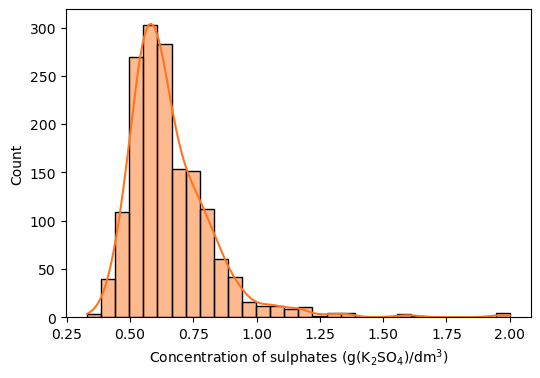

In [17]:
plt.figure(figsize=(6, 4))

sns.histplot(wine_data.sulphates, bins=30, color='#ff751f', kde=True)
plt.xlabel('Concentration of sulphates (g(K$_2$SO$_4$)/dm$^3$)')
plt.ylabel('Count')
plt.show()

From the histogram, we can see that the `sulphates` data are **not normally distributed**. The distribution is positively skewed, with a longer tail toward higher values. This is consistent with the descriptive statistics we calculated earlier, where the mean is larger than the median.

Another common way to visually assess whether data follow a normal distribution is by using a **Q-Q plot** (quantile-quantile plot).

A Q-Q plot compares the quantiles of the observed data with the quantiles of a theoretical distribution, most commonly the normal distribution. If the data are approximately normally distributed, the points will lie close to a straight line. Systematic deviations from this line indicate departures from normality, such as skewness or heavy tails.

We now use a Q-Q plot to further assess the distribution of the `sulphates` variable.


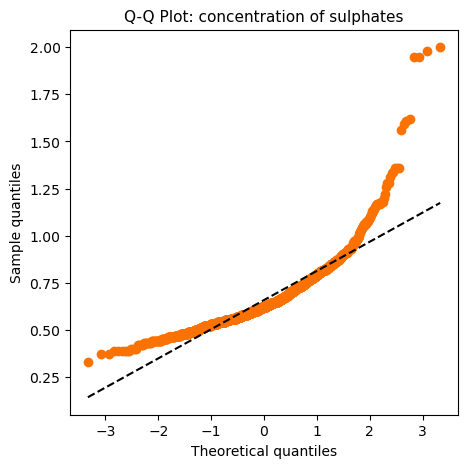

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))

res = stats.probplot(wine_data.sulphates, dist='norm', plot=ax)

ax.get_lines()[0].set_markerfacecolor('#fc7202')
ax.get_lines()[0].set_markeredgecolor('#fc7202')
ax.get_lines()[1].set_color('black')
ax.get_lines()[1].set_linestyle("--")

ax.set_title('Q-Q Plot: concentration of sulphates', fontsize=11)
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Sample quantiles')

plt.show()

From the Q-Q plot, we can clearly see that the `sulphates` data do **not** follow a normal distribution. If the data were normally distributed, the points would lie close to the dashed reference line. Instead, we observe systematic deviations from this line.

In particular, the upper quantiles bend upward away from the line, indicating a **positive (right) skew**. This means that higher `sulphate` values occur more frequently than would be expected under a normal distribution. This observation is consistent with what we saw earlier.

> To formally assess whether data are normally distributed, statistical tests such as the **Kolmogorov–Smirnov test** and the **Shapiro–Wilk test** can be used. These tests provide a quantitative measure of deviation from normality. However, for now, we focus on visual inspection and intuition rather than formal testing.

<font color='#ff751f'> *Think: Based on the histogram, descriptive statistics, and the Q-Q plot, what type of distribution do you think the `sulphates` data are likely to follow?* </font>


*Based on what we have seen so far, the `sulphates` data are very likely to follow a **lognormal distribution** rather than a normal distribution. This is consistent with what we discussed earlier: concentration data in environmental and chemical analyses often show positive skew and are commonly lognormally distributed.*

A common approach when working with lognormally distributed data is to apply a **log transformation**. Log-transforming the data can reduce skewness, stabilize variance, and make the data more suitable for statistical methods that assume normality.

Next, we will apply a log transformation to the `sulphates` variable and re-examine its distribution.


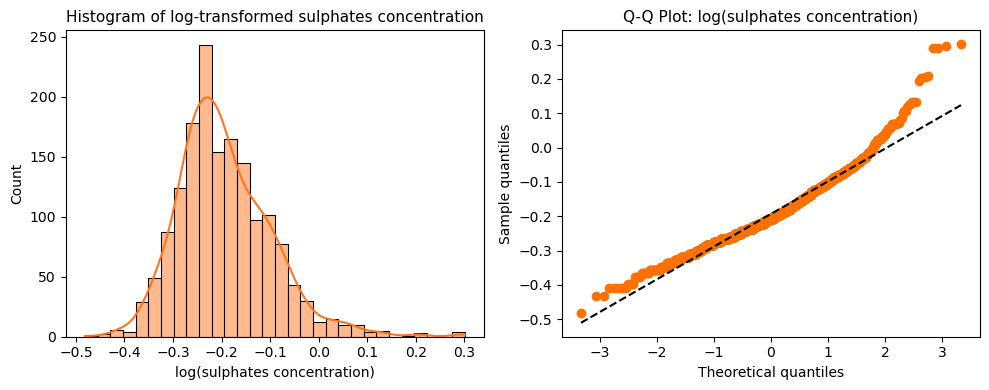

In [24]:
# Log-transform sulphates
wine_data['log_sulphates'] = np.log10(wine_data.sulphates)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram of log-transformed sulphates
sns.histplot(wine_data.log_sulphates, bins=30, color='#ff751f', kde=True, ax=axes[0])
axes[0].set_xlabel('log(sulphates concentration)')
axes[0].set_ylabel('Count')
axes[0].set_title('Histogram of log-transformed sulphates concentration', fontsize=11)

# Q-Q plot of log-transformed sulphates
res = stats.probplot(wine_data.log_sulphates, dist='norm', plot=axes[1])
axes[1].get_lines()[0].set_markerfacecolor('#fc7202')
axes[1].get_lines()[0].set_markeredgecolor('#fc7202')
axes[1].get_lines()[1].set_color('black')
axes[1].get_lines()[1].set_linestyle('--')
axes[1].set_title('Q-Q Plot: log(sulphates concentration)', fontsize=11)
axes[1].set_xlabel('Theoretical quantiles')
axes[1].set_ylabel('Sample quantiles')

plt.tight_layout()
plt.show()

## Statistical inference and hypothesis testing

Now that we understand why data distributions matter and how parametric and non-parametric methods differ, we are ready to move toward **statistical modeling**. However, before fitting models, there is one more essential concept to cover: **statistical inference and hypothesis testing**.

By *inference*, we mean the formal process of drawing conclusions from data. The goal of statistical inference is to reach conclusions that are supported by evidence rather than observation or intuition alone. In statistics, evidence is obtained through the careful application of statistical methods and the evaluation of probabilities.

You might ask why hypothesis testing is necessary. Many of you have probably fitted linear regression models, which are the main statistical models we will study in this course, without explicitly considering hypothesis testing. In reality, hypothesis testing is already embedded in these models. It allows us to answer fundamental questions such as:
- Are the predictors in a regression model statistically important?
- Is an observed relationship likely to be real or could it be explained by random variation?
- Is the overall model statistically significant?

In regression analysis, these questions are addressed using ***t*-tests** for individual regression coefficients and ***F*-tests** for overall model significance. These tests are parametric and therefore rely on assumptions about data distributions and model residuals. This is why the discussion of distributions and transformations directly connects to hypothesis testing.

To carry out a **hypothesis test**, we always begin with a **question**. What do we want to learn from the data?

---

### The frequentist framework for hypothesis testing

Once the research question is clear, the frequentist framework guides us through a formal and reproducible sequence of steps.

##### 1. Formulate the hypotheses
We express the research question as two competing statements:
- **Null hypothesis ($H_0$)**: assumes there is **no real effect or difference**, and that any observed variation is due to **random chance**.
- **Alternative hypothesis ($H_1$)**: represents the claim that there **is** a real effect or that the parameter differs from the value stated in $H_0$.

These hypotheses must be **mutually exclusive** and together cover **all possible outcomes**.  
Importantly, we can never prove $H_0$ to be true. We can only **fail to reject it** based on the available data. Hypothesis tests are designed to look for sufficient evidence to reject $H_0$.

##### 2. Establish the test statistic and its null distribution
Next, we identify a **test statistic** that will be used to compare $H_0$ and $H_1$. The choice depends on:
- the **type of data** (e.g., means, variances, proportions),
- the **study design** (e.g., one-sample, paired, independent samples),
- and what is **known about the population**.

Under the null hypothesis, the test statistic follows a known **sampling distribution**, such as the *z*-, *t*-, *χ²*-, or *F*- distribution.


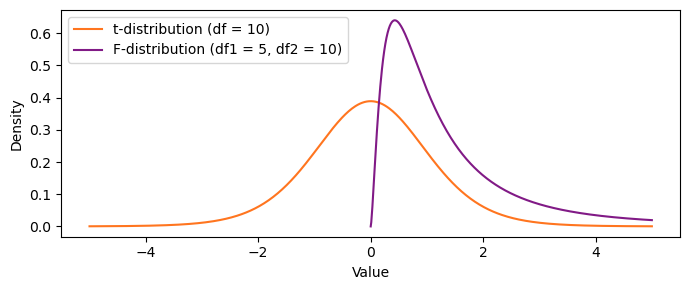

In [39]:
# Plot t and F distributions
# Define x ranges
x_t = np.linspace(-5, 5, 500)
x_f = np.linspace(0, 5, 500)

# Degrees of freedom
df_t = 10
df_f1, df_f2 = 5, 5

# Compute PDFs
t_pdf = stats.t.pdf(x_t, df=df_t)
f_pdf = stats.f.pdf(x_f, dfn=df_f1, dfd=df_f2)

# Plot
plt.figure(figsize=(7, 3))

plt.plot(x_t, t_pdf, label='t-distribution (df = 10)', c='#ff751f')
plt.plot(x_f, f_pdf, label='F-distribution (df1 = 5, df2 = 10)', c="#811a86")

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


##### 3. Set the decision rule
We then define how we will decide whether to reject $H_0$:
- Choose a **significance level** $\alpha$, which represents the probability of making a **Type I error**. A common choice is $\alpha = 0.05$.
- Determine the **critical value(s)** from the null distribution that define the **rejection region**.
- Alternatively, use the ***p*-value approach**, where $H_0$ is rejected if the *p*-value is less than or equal to $\alpha$.

> **One-tailed and two-tailed tests**
>
> The formulation of the alternative hypothesis determines whether a test is **one-tailed** or **two-tailed**.
> - If $H_1$ states that a parameter is simply different from the null value ($\mu \ne \mu_0$), the test is **two-tailed**, and $\alpha$ is split between both tails.
> - If $H_1$ specifies a direction ($\mu > \mu_0$ or $\mu < \mu_0$), the test is **one-tailed**, and all of $\alpha$ lies in one tail.
>
> This choice must be made **before** looking at the data and should be driven by the research question.




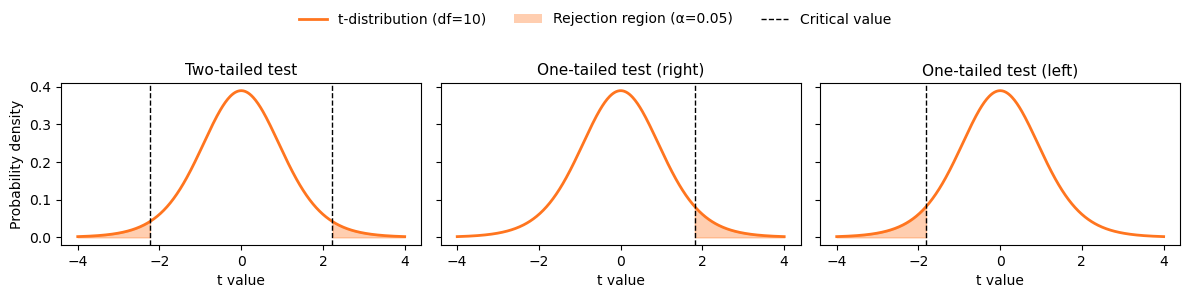

In [42]:
alpha = 0.05
df = 10

# Range for t-distribution
x = np.linspace(-4, 4, 400)
y = stats.t.pdf(x, df)

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

# Two-tailed test
t_crit_two = stats.t.ppf(1 - alpha / 2, df)

axes[0].plot(x, y, c='#ff751f', lw=2)
axes[0].fill_between(x, y, 0, where=(x <= -t_crit_two), color='#ff751f', alpha=0.35)
axes[0].fill_between(x, y, 0, where=(x >= t_crit_two), color='#ff751f', alpha=0.35)
axes[0].axvline(-t_crit_two, c='black', lw=1, ls='--')
axes[0].axvline(t_crit_two, c='black', lw=1, ls='--')
axes[0].set_title('Two-tailed test', fontsize=11)
axes[0].set_xlabel('t value')
axes[0].set_ylabel('Probability density')

# One-tailed test (right)
t_crit_right = stats.t.ppf(1 - alpha, df)

axes[1].plot(x, y, c='#ff751f', lw=2)
axes[1].fill_between(x, y, 0, where=(x >= t_crit_right), color='#ff751f', alpha=0.35)
axes[1].axvline(t_crit_right, c='black', lw=1, ls='--')
axes[1].set_title('One-tailed test (right)', fontsize=11)
axes[1].set_xlabel('t value')

# One-tailed test (left)
t_crit_left = stats.t.ppf(alpha, df)

axes[2].plot(x, y, c='#ff751f', lw=2)
axes[2].fill_between(x, y, 0, where=(x <= t_crit_left), color='#ff751f', alpha=0.35)
axes[2].axvline(t_crit_left, c='black', lw=1, ls='--')
axes[2].set_title('One-tailed test (left)', fontsize=11)
axes[2].set_xlabel('t value')

handles = [
    plt.Line2D([0], [0], color='#ff751f', lw=2, label=f't-distribution (df={df})'),
    plt.Rectangle((0, 0), 1, 1, fc='#ff751f', alpha=0.35, label=f'Rejection region (α={alpha})'),
    plt.Line2D([0], [0], color='black', lw=1, ls='--', label='Critical value')
]

fig.legend(handles=handles, loc='upper center', ncol=3, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()

##### 4. Compute the test statistic and make a decision
Using the sample data, we compute the observed value of the test statistic and compare it to the decision rule:
- If the statistic falls in the rejection region or if *p* ≤ $\alpha$, we **reject $H_0$**.
- Otherwise, we **fail to reject $H_0$**.

##### 5. Interpret the result
Statistical results only have meaning when interpreted in context:
- Clearly state what the decision implies for the original research question.
- Remember that failing to reject $H_0$ does not prove it is true.
- Whenever possible, complement hypothesis tests with **effect sizes** and **confidence intervals**.

---

#### Type I and Type II Errors

When we make decisions based on sample data, there are **two kinds of mistakes** we can make.
These are called **Type I** and **Type II** errors.

Whenever we perform a hypothesis test, there are two possible *truths* (whether $H_0$ is true or false) and two possible *decisions* (whether we reject $H_0$ or not).  
The four combinations lead to the following outcomes:

| Null hypothesis ($H_0$) is ...| True | False |
|-------------------------|----------------|-----------------|
| **Rejected** | <font color='#ff751f'> **Type I error** </font> (false positive)| <font color='#1b7173'> **Correct decision** </font> (true positive) |
| **Failed to reject** | <font color='#1b7173'> **Correct decision** </font> (true negative) | <font color='#ff751f'> **Type II error** </font> (false negative) |

- **Type I error (α):**  
  Occurs when we *reject a true null hypothesis*.  
  In other words, we detect an effect that **does not actually exist**.  
  The probability of making this error is the **significance level**,  
  typically $\alpha = 0.05$ (5%).

- **Type II error (β):**  
  Occurs when we *fail to reject a false null hypothesis*.  
  In other words, we **miss a real effect** that does exist.  
  The probability of this mistake is denoted by **β**.

- **Power of a test (1 − β):**  
  The probability of correctly rejecting a false $H_0$.  
  A more *powerful* test has a smaller chance of missing true effects.

<p align="left">
  <img src="https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog.jpg"
       alt="joke_errors"
       width="800">
</p>

**How to interpret α and β**
- The smaller the **α**, the less likely we are to make a **Type I error**, but the harder it becomes to detect true effects (increasing **β**).  
- Conversely, increasing **α** makes it easier to find effects (reducing **β**), but increases the risk of false positives.  
- Therefore, α and β are **interconnected** - lowering one usually raises the other.

In practice, we choose α (e.g., 0.05) before testing, and aim to design studies with high **power** (often ≥ 0.8), to minimize the risk of both errors as much as possible.

![errors](https://www.researchgate.net/publication/361295532/figure/fig2/AS:11431281100133326@1669325756681/The-relationship-between-a-type-I-error-alpha-and-a-type-II-error-beta-Note.png)

#### <font color='#fc7202'>Task 2: Certified reference material</font>
Let’s now put all this theory into practice.

You purchase a **certified reference material (CRM)** for *lead (Pb)* concentration in rainwater. According to **NIST**, the certified concentration is **190 ng/L**.\
You analyze this reference sample **ten times** using your instrument and obtain the following results (in ng/L):
$187,\; 171,\; 191,\; 176,\; 196,\; 181,\; 189,\; 190,\; 185,\; 189$

Test whether your measurements **differ** from the certified value at the **95% confidence level**.

> *Hints:*
>
> - Start by clearly stating your hypotheses ($H_0$ and $H_1$).   
> - Check the assumptions of the test
> - To perform the test, you can use the built-in function `scipy.stats.ttest_1samp()`.

*In practice, the main question is how to choose the right statistical test for a given problem.*\
*The figure below summarizes the decision process and provides guidance on selecting an appropriate test.*
![pick_correct](https://raw.githubusercontent.com/RaHub4AI/MI7032/refs/heads/main/Pictures/Hypothesis%20Testing%20Key%202023.png)

- **Null hypothesis ($H_0$):**  
  The true mean lead concentration measured by the instrument is equal to the certified reference value.  
  <font color='#1b7173'>*$H_0\!:\,\mu = 190$*</font>

- **Alternative hypothesis ($H_1$):**  
  The true mean lead concentration measured by the instrument differs from the certified reference value.  
  <font color='#1b7173'>*$H_1\!:\,\mu \neq 190$*</font> 
	​



In [44]:
# Creating DataFrame with 10 measurements of lead concentration (ng/L)
# Each row represents one sample (sample_id) and its corresponding measured value.
lead_df = pd.DataFrame({'sample_id': np.arange(1, 11),
                        'lead_concentration': [187, 171, 191, 176, 196, 181, 189, 190,185, 189]})
lead_df

,sample_id,lead_concentration
0,1,187
1,2,171
2,3,191
3,4,176
4,5,196
5,6,181
6,7,189
7,8,190
8,9,185
9,10,189


Before running a *t*-test, we should check the **normality assumption** for this small sample.  
Let’s (i) visualize the data and (ii) run the Shapiro–Wilk test, which is suitable for small samples.  
The Shapiro–Wilk null hypothesis is that the data are normally distributed.  
We’ll use a significance level of *α* = 0.05: if the *p*-value < 0.05, we have evidence against normality.


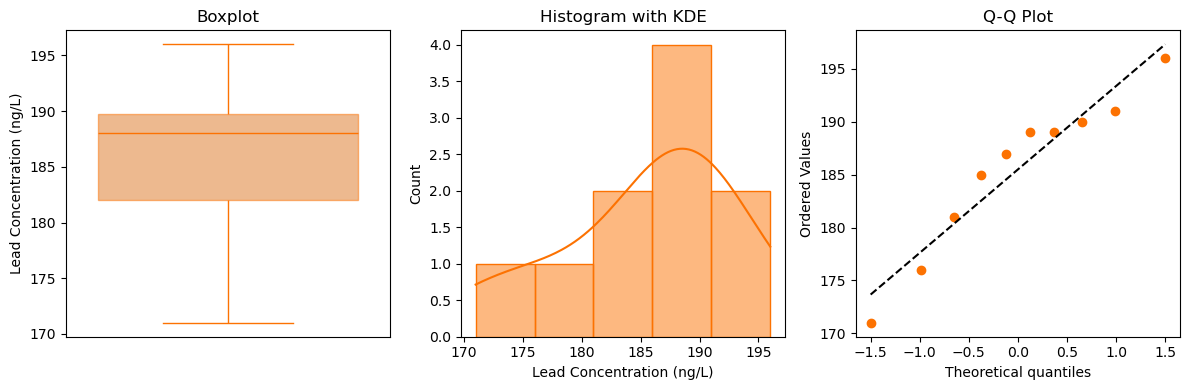

In [46]:
# Visualizing the lead concentration data using boxplot, histogram with KDE, and Q-Q plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(y='lead_concentration', data=lead_df, linecolor='#fc7202', color='#fc7202',  boxprops=dict(alpha=.5), ax=axes[0])
axes[0].set_xticks([])
axes[0].set_ylabel('Lead Concentration (ng/L)')
axes[0].set_title('Boxplot')

sns.histplot(x='lead_concentration', data=lead_df, kde=True, color='#fc7202', edgecolor='#fc7202', ax=axes[1])
axes[1].set_xlabel('Lead Concentration (ng/L)')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogram with KDE')


stats.probplot(lead_df['lead_concentration'], dist="norm", plot=axes[2])
axes[2].get_lines()[0].set_markerfacecolor('#fc7202')   # color of the points
axes[2].get_lines()[0].set_markeredgecolor('#fc7202')
axes[2].get_lines()[1].set_color('black')             # color of the reference line
axes[2].get_lines()[1].set_linestyle('--')             # style of the reference line
axes[2].set_title("Q-Q Plot")
plt.tight_layout()

In [5]:
# Performing the Shapiro-Wilk test for normality on the lead concentration data
statistic_SW, p_value_SW = stats.shapiro(lead_df['lead_concentration'])
print(f'Shapiro-Wilk test statistic: {statistic_SW:.4f}, p-value: {p_value_SW:.4f}')

Shapiro-Wilk test statistic: 0.9327, p-value: 0.4749


Even though the plots (especially the Q-Q plot) suggest the data are not perfectly normal, the Shapiro-Wilk test gives *p* = 0.4749.\
With *α*=0.05, we fail to reject the null hypothesis of normality.\
We will therefore proceed under the normality assumption and conduct a one-sample *t*-test.\
(*Note: with small samples, mild visual deviations are common; the *t*-test is reasonably robust when normality is not strongly violated.*)

> *Recall:* The goal is to test whether your measurements differ from the certified value (190 ng/L) at the 95% confidence level.

In [48]:
confidence_level = 0.95
alpha = 1 - confidence_level
population_mean = 190

# Performing a one-sample t-test to compare the sample mean to the population mean of 190 ng/L
t_statistic_two_tailed, p_value_two_tailed = ttest_1samp(lead_df['lead_concentration'], popmean=population_mean, alternative='two-sided')
print(f't-statistic: {t_statistic_two_tailed:.4f}, p-value: {p_value_two_tailed:.4f}')

t-statistic: -1.8932, p-value: 0.0909


The *p*-value from the two-tailed one-sample *t*-test is 0.0909, which is larger than the chosen significance level (*α* = 0.05, corresponding to a 95% confidence level). Therefore, we **fail to reject the null hypothesis**.

This means that, based on the available data, there is not enough statistical evidence to conclude that the mean lead concentration is different from 190 ng/L. The observed difference could reasonably be explained by random sampling variability.
